In [4]:
#support vector regressor 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("/Users/Saarth/Desktop/PS1/final_data.csv")
print(train.shape)
train.head()

(5831, 40)


,Slab Width,Slab Length,AL,B,C,CA,NB,CR,CU,MN,...,Radiant Tube Furnace Dewpoint,After Tube Cooling Dewpoint,Rapid Jet Cooling Dewpoint,Coating Thickness,Drying Furnace Press,B50,Hardness,Coreloss-Before Aging,Coreloss After Aging,Permeability
0,1265.0,9730.0,0.002,0.0001,0.0012,0.0002,0.0002,0.026,0.006,0.21,...,-18.500,-26.132,-18.20668,1.50,-6.026,1.73,128.0,5.70,5.74,1963.0
1,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-99.000,-99.000,-98.99991,1.55,-6.324,1.73,120.0,5.92,5.92,1921.0
2,1265.0,7810.0,0.002,0.0001,0.0012,0.0002,0.0002,0.026,0.006,0.21,...,-25.112,-23.253,-12.16960,1.48,-6.512,1.72,124.0,5.15,5.15,1853.0
3,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-23.525,-27.873,-12.54678,1.41,-6.806,1.74,121.0,5.42,5.47,2071.0
4,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-19.758,-25.796,-16.47658,1.37,-6.831,1.72,122.0,5.38,5.40,1747.0


In [6]:
X= train[['Slab Width', 'Slab Length', 'AL', 'B', 'C', 'CA', 'NB', 'CR', 'CU',
       'MN', 'MO', 'N', 'NI', 'P', 'S', 'SI', 'TI', 'V',
       'Reheating Furnace Exit Temp', 'Finishing Temp', 'Coiling Temp',
       'FM Exit Thickness', 'Coil Outr Dia', 'Avg line speed', 'weld pressure',
       'Reduction Ratio', 'ACL-Thickness', 'ACL-Width', 'ACL-Length',
       'O2 in Heating Element Furnace', 'Radiant Tube Furnace Dewpoint',
       'After Tube Cooling Dewpoint', 'Rapid Jet Cooling Dewpoint',
       'Coating Thickness', 'Drying Furnace Press']]

print(X)

      Slab Width  Slab Length     AL       B       C      CA      NB     CR  \
0         1265.0       9730.0  0.002  0.0001  0.0012  0.0002  0.0002  0.026   
1         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
2         1265.0       7810.0  0.002  0.0001  0.0012  0.0002  0.0002  0.026   
3         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
4         1265.0       9730.0  0.001  0.0001  0.0016  0.0001  0.0002  0.031   
...          ...          ...    ...     ...     ...     ...     ...    ...   
5826      1290.0       9500.0  0.218  0.0001  0.0023  0.0010  0.0002  0.020   
5827      1290.0       9500.0  0.218  0.0001  0.0023  0.0010  0.0002  0.020   
5828      1290.0       9450.0  0.239  0.0002  0.0019  0.0010  0.0003  0.020   
5829      1290.0       9500.0  0.239  0.0002  0.0019  0.0010  0.0003  0.020   
5830      1290.0       9500.0  0.237  0.0002  0.0022  0.0010  0.0002  0.020   

         CU    MN  ...  Reduction Ratio  ACL-Thickn

In [7]:
y=train[['Permeability']]
print(y)

      Permeability
0           1963.0
1           1921.0
2           1853.0
3           2071.0
4           1747.0
...            ...
5826        1809.0
5827        1838.0
5828        1820.0
5829        1820.0
5830        1906.0

[5831 rows x 1 columns]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [9]:
svr= SVR()
svr.fit(X_train,y_train.values.ravel())

SVR()

In [10]:
y_pred=svr.predict(X_test)
y_pred

array([1827.65132472, 1791.20260193, 1835.95121756, ..., 1827.15337577,
       1816.58543672, 1826.66941215])

In [11]:
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

412.48225915998376

In [12]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,y_pred)
print('r1',r1)

r1 -0.022857396799815577


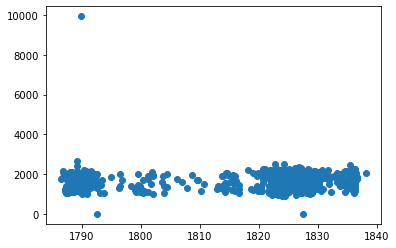

In [13]:
plt.scatter(y_pred,y_test)